In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#### L3 Neurons

$ \tau \frac{dh}{dt} = -h + RI(t)$

Solution for $I(t) = \alpha [\sin(\omega t + \theta) + \beta] $

$h(t) = \frac{1}{\tau} \exp\left( -t/\tau \right) \int R I(t) \exp\left(t/\tau \right) dt $ 

$h(t) = \frac{\frac{R\alpha}{\tau}\left[ \frac{1}{\tau} \sin(\omega t + \theta)- \omega \cos(\omega t + \theta) \right]}{\omega^{2} + (1/\tau)^{2}} $

In [5]:
def Stimuli():
    ##### Calibrating luminance values with experimental values ####
    L0_exp_min = 1.2E4
    L0_exp_max = 10.6E4
    L0_model_min = 1
    L0_model_max = (L0_exp_max*L0_model_min)/L0_exp_min

    time_array_st = np.arange(T_min_st, T_max_st, dt_st)
    
    L0 = np.array([L0_model_min, (2.6E4*L0_model_min)/L0_exp_min, (5.3E4*L0_model_min)/L0_exp_min, (7.9E4*L0_model_min)/L0_exp_min, L0_model_max]) # Stimulus Luminance
    
    Nl = L0.size
    S = np.zeros((Nl, Nt_st))
    S_plot = np.zeros((Nl, Nt_st))
    time_array_st = np.arange(T_min_st, T_max_st, dt_st)
    S_squared_array = 0
    S_squared = np.zeros((Nt_st))
    idx_squared = np.where(np.sin(Omega*2*np.pi*time_array_st)>0)[0]
    S_squared[idx_squared] = 1
    counter_c = -1
    l0st_array = 0
    for l_ in L0:
        counter_c += 1
        S[counter_c, :] = l_*(np.sin(Omega*2*np.pi*time_array_st) + 1)
        S_plot[counter_c,:] = l_*(np.sin((Omega*2*np.pi*time_array_st) - (np.pi/2)) + 1)
        l0st_array = np.append(np.append(l0st_array, S_plot[counter_c,:]), np.ones(Nt_st)) 
        S_squared_array = np.append(np.append(S_squared_array, np.sign(S_squared + 1) ), np.zeros(Nt_st))
    S_squared_array = S_squared_array[1:]

    S /= np.max(S)
    S_plot /= np.max(S_plot)
    l0st_array = l0st_array[1:]
    
    return l0st_array, L0, S, S_plot, S_squared_array

In [6]:
### Stimuli parameter ###
dt_st = 0.1   # Time window in s.
T_max_st = 4  # Epoch duration in s.
T_min_st = 0
Nt_st = int((T_max_st - T_min_st)/dt_st)
Omega = 1    # Stimulus Frequency
C0 = 10      # Stimulus Contrast

l0st_array, L0, S, S_plot, S_squared_array = Stimuli()


2.0
4.333333333333333
8.833333333333334
13.166666666666666
17.666666666666668


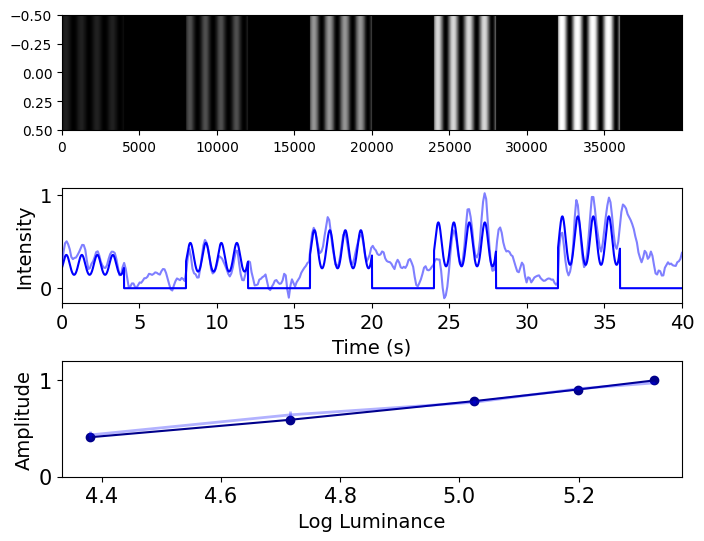

In [33]:
#--- Parameters ----

#alpha = 1
#omega_ = 1
#omega = omega_*(2*np.pi)
#theta = 0
#R = 0.2
#beta = 1
#hr = 0.3 

alpha = 1
omega_ = 1
omega = omega_*(2*np.pi)
theta = 0
R = 0.3
beta = 1
hr = 0.15 

t_max = 4
dt = 0.001
t = np.arange(0, t_max, dt)
Nt = t.size
h = 0 
s = 0
t_array = 0
counter = -1
Amp = 0
tau = 0.2

L0_exp_min = 1.2E4
L0_exp_max = 10.6E4
L0_model_min = 2
L0_model_max = (L0_exp_max*L0_model_min)/L0_exp_min
L0 = np.array([ L0_model_min, (2.6E4*L0_model_min)/L0_exp_min, (5.3E4*L0_model_min)/L0_exp_min, (7.9E4*L0_model_min)/L0_exp_min, L0_model_max])


for alpha in L0:
    print(alpha)
    counter += 1
    tau_ = 1/tau
    s = np.append(s, alpha*(np.sin( omega*t + theta ) + 1)*0.5 )
    s = np.append(s, np.zeros(Nt))
#     h_new = R*( np.log10(10*alpha)*((np.sin(omega*t + theta)+1)*(0.5))  )
    h_new = (R*0.5*np.log10(10*alpha)*tau_*( tau_*np.sin(omega*t) - Omega*np.cos(omega*t) )/(omega**2 + tau_**2)) + R*0.5*np.log10(10*alpha) + hr
    h_new = 2*(h_new)**2
    h = np.append(h, h_new)
    idx_freq = np.where( np.fft.fftshift(np.fft.fftfreq(t.size, d = dt)) >= omega_ )[0][0]
    h_f = np.fft.fftshift(np.fft.fft(h_new))
    Amp = np.append(Amp, 2*np.abs(h_f[idx_freq])/t.size)
    h_ct = 0*R*alpha*beta
    h = np.append(h, h_ct*np.ones(Nt))
    t_array = np.append(t_array, (counter*t_max*2) + np.append(t, t+t_max))
t_array = t_array[1:]
h = h[1:]
s = s[1:]
Amp = Amp[1:]

#np.savetxt("Data/L2_tracesVsTime_model.txt", np.array((t_array, h)))
#np.savetxt("Data/L2_Amp_model.txt", Amp)

L3_amp_exp = np.loadtxt("Data/L2_Amp_exp.txt")

L3_data_ = sio.loadmat("ExpData/201022_sine_grating_withBG/L2__sine_grating_BG_included.mat")['data_dict'][0][0][0]
N_neurons, N_time, N_epoch = L3_data_.shape
N_time_T = (N_time - 40)*N_epoch
Time_array = np.linspace(0, N_time_T*0.1, N_time_T)
L3_data = np.zeros((N_neurons, N_time_T))
for Neuron in range(N_neurons):
    L3_data[Neuron, :] = np.reshape(np.transpose(L3_data_[Neuron,40:,:]), (N_time_T))

#np.savetxt("Data/L2_data_plot.txt", L3_data)   
#np.savetxt("Data/L2_LarrayAmp_data_plot.txt", np.log10(L0*L0_exp_min)) 
    
fig, ax = plt.subplots(3, 1, figsize = (8, 6))
fig.subplots_adjust(hspace = 0.5)
ax[0].imshow(np.reshape(s, (1, s.size)), aspect = 'auto', cmap = 'Greys_r')
# ax[0].plot(t_array, s, color = 'k')
ax[1].plot(t_array, h, color = 'b')
ax[1].plot(Time_array, L3_data[10, :] + 0.3, alpha = 0.5, color = 'b', zorder = 10)
ax[1].tick_params(labelsize=14)
ax[1].set_ylabel("Intensity", fontsize = 14)
ax[1].set_xlabel("Time (s)", fontsize = 14)
ax[1].set_xlim(0, 40)
ax[2].plot(np.log10(L0*L0_exp_min), Amp/np.max(Amp), marker = 'o', color = 'darkblue')
ax[2].errorbar(np.log10(L0*L0_exp_min), np.mean(L3_amp_exp, axis = 1), yerr = np.std(L3_amp_exp, axis = 1)**2, color = 'b', alpha = 0.3, linewidth = 2)
ax[2].tick_params(labelsize=15)
ax[2].set_ylabel("Amplitude", fontsize = 14)
ax[2].set_xlabel("Log Luminance", fontsize = 14)
ax[2].set_ylim(0., 1.2)
#plt.savefig("Plots/L2_ModelAndExp_Complete.pdf")
plt.show()

### Plot L2 and L3

In [60]:
t_array_L2, h_L2 = np.loadtxt("Data/L2_tracesVsTime_model.txt")
Amp_L2 = np.loadtxt("Data/L2_Amp_model.txt")
t_array_L3, h_L3 = np.loadtxt("Data/L3_tracesVsTime_model.txt")
Amp_L3 = np.loadtxt("Data/L3_Amp_model.txt")

L2_data = np.loadtxt("Data/L2_data_plot.txt")   
Amp_xarray = np.loadtxt("Data/L2_LarrayAmp_data_plot.txt")
L3_data = np.loadtxt("Data/L3_data_plot.txt") 
Amp_xarray_L3 = np.loadtxt("Data/L3_LarrayAmp_data_plot.txt")

L2_amp_exp = np.loadtxt("Data/L2_Amp_exp.txt")
L3_amp_exp = np.loadtxt("Data/L3_Amp_exp.txt")

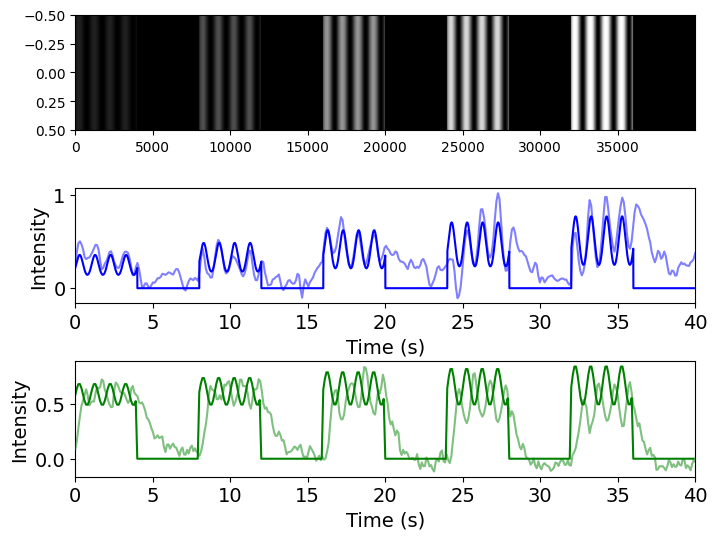

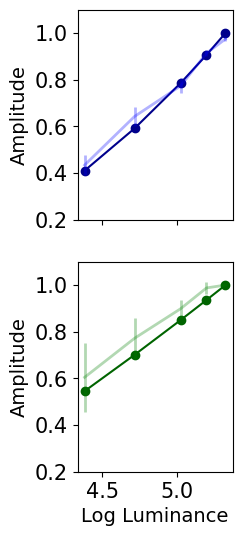

In [64]:
fig, ax = plt.subplots(3, 1, figsize = (8, 6))
fig.subplots_adjust(hspace = 0.5)
ax[0].imshow(np.reshape(s, (1, s.size)), aspect = 'auto', cmap = 'Greys_r')
ax[1].plot(t_array_L2, h_L2, color = 'b')
ax[1].plot(Time_array, L2_data[10, :] + 0.3, alpha = 0.5, color = 'b', zorder = 10)
ax[1].tick_params(labelsize=14)
ax[1].set_ylabel("Intensity", fontsize = 14)
ax[1].set_xlabel("Time (s)", fontsize = 14)
ax[1].set_xlim(0, 40)

ax[2].plot(t_array_L3, h_L3, color = 'g')
ax[2].plot(Time_array, L3_data[7, :] + 0.3, alpha = 0.5, color = 'g', zorder = 10)
ax[2].tick_params(labelsize=14)
ax[2].set_ylabel("Intensity", fontsize = 14)
ax[2].set_xlabel("Time (s)", fontsize = 14)
ax[2].set_xlim(0, 40)

#plt.savefig("Plots/L2L3_ModelAndExp_Complete.pdf", bbox_inches = 'tight', dpi = 300)

fig, ax = plt.subplots(2, 1, figsize = (2, 6))
ax[0].plot(Amp_xarray, Amp_L2/np.max(Amp_L2), marker = 'o', color = 'darkblue')
ax[0].errorbar(Amp_xarray, np.mean(L2_amp_exp, axis = 1), yerr = np.std(L2_amp_exp, axis = 1)**2, color = 'b', alpha = 0.3, linewidth = 2)
ax[1].plot(Amp_xarray_L3, Amp_L3/np.max(Amp_L3), marker = 'o', color = 'darkgreen')
ax[1].errorbar(Amp_xarray_L3, np.mean(L3_amp_exp, axis = 1), yerr = np.std(L3_amp_exp, axis = 1)**2, color = 'g', alpha = 0.3, linewidth = 2)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[0].set_ylabel("Amplitude", fontsize = 14)
#ax[0].set_xlabel("Log Luminance", fontsize = 14)
ax[0].set_xticklabels([])
ax[0].set_ylim(0.2, 1.1)
ax[1].set_ylabel("Amplitude", fontsize = 14)
ax[1].set_xlabel("Log Luminance", fontsize = 14)
ax[1].set_ylim(0.2, 1.1)
#plt.savefig("Plots/L2L3_ModelAndExp_Amp_Complete.pdf", bbox_inches = 'tight', dpi = 300)
plt.show()